![picture](https://images.herzindagi.info/image/2022/Oct/IMR-main.jpg)

**<h1> Infant Mortality Rate India - Data Collection**

Infant Mortality Rate (IMR) defined as the number of infant deaths (under one year of age) per 1,000 live births, is a key metric that sheds light on the vulnerability of newborns and infants to various health challenges. We will be analyzing and exploring the infant mortality rates using a dataset that includes information about various factors potentially affecting infant mortality in India.

#Importing Libraries

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
#from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
from google.colab import drive
#import plotly.express as px
from sklearn import metrics
#from folium import plugins
#from folium import GeoJson
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np
#import folium

# Reading Data

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# get data from Google drive
tl = pd.read_csv(r"/content/drive/MyDrive/archive (1)/trends_residence_2006-2012_IMR.csv")
tl

,India/States/Uts,Total-2006,Total-2007,Total-2008,Total-2009,Total-2010,Total-2011,Total-2012,Rural-2006,Rural-2007,...,Rural-2010,Rural-2011,Rural-2012,Urban-2006,Urban-2007,Urban-2008,Urban-2009,Urban-2010,Urban-2011,Urban-2012
0,INDIA,57.0,55.0,53.0,50.0,47.0,44.0,42.0,62.0,61.0,...,51.0,48.0,46.0,39.0,37.0,36.0,34.0,31.0,29.0,28.0
1,Andhra Pradesh,56.0,54.0,52.0,49.0,46.0,43.0,41.0,62.0,60.0,...,51.0,47.0,46.0,38.0,37.0,36.0,35.0,33.0,31.0,30.0
2,Assam,67.0,66.0,64.0,61.0,58.0,55.0,55.0,70.0,68.0,...,60.0,58.0,58.0,42.0,41.0,39.0,37.0,36.0,34.0,33.0
3,Bihar,60.0,58.0,56.0,52.0,48.0,44.0,43.0,62.0,59.0,...,49.0,45.0,44.0,45.0,44.0,42.0,40.0,38.0,34.0,34.0
4,Chhatisgarh,61.0,59.0,57.0,54.0,51.0,48.0,47.0,62.0,61.0,...,52.0,49.0,48.0,50.0,49.0,48.0,47.0,44.0,41.0,39.0
5,Delhi,37.0,36.0,35.0,33.0,30.0,28.0,25.0,42.0,41.0,...,37.0,36.0,36.0,36.0,35.0,34.0,31.0,29.0,26.0,23.0
6,Gujarat,53.0,52.0,50.0,48.0,44.0,41.0,38.0,62.0,60.0,...,51.0,48.0,45.0,37.0,36.0,35.0,33.0,30.0,27.0,24.0
7,Haryana,57.0,55.0,54.0,51.0,48.0,44.0,42.0,62.0,60.0,...,51.0,48.0,46.0,45.0,44.0,43.0,41.0,38.0,35.0,33.0
8,Himachal Pradesh,50.0,47.0,44.0,45.0,40.0,38.0,36.0,52.0,49.0,...,41.0,38.0,37.0,26.0,25.0,27.0,28.0,29.0,28.0,25.0
9,Jammu and Kashmir,52.0,51.0,49.0,45.0,43.0,41.0,39.0,54.0,53.0,...,45.0,43.0,41.0,38.0,38.0,37.0,34.0,32.0,28.0,28.0


# Data Preprocessing

## Handling Null values

In [5]:
tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   India/States/Uts  36 non-null     object 
 1   Total-2006        36 non-null     float64
 2   Total-2007        36 non-null     float64
 3   Total-2008        36 non-null     float64
 4   Total-2009        36 non-null     float64
 5   Total-2010        36 non-null     float64
 6   Total-2011        36 non-null     float64
 7   Total-2012        36 non-null     float64
 8   Rural-2006        36 non-null     float64
 9   Rural-2007        36 non-null     float64
 10  Rural-2008        36 non-null     float64
 11  Rural-2009        36 non-null     float64
 12  Rural-2010        36 non-null     float64
 13  Rural-2011        36 non-null     float64
 14  Rural-2012        36 non-null     float64
 15  Urban-2006        36 non-null     float64
 16  Urban-2007        36 non-null     float64
 17 

We can see there are two null values in each column. Let's check their positions.

In [6]:
tl.isnull()

,India/States/Uts,Total-2006,Total-2007,Total-2008,Total-2009,Total-2010,Total-2011,Total-2012,Rural-2006,Rural-2007,...,Rural-2010,Rural-2011,Rural-2012,Urban-2006,Urban-2007,Urban-2008,Urban-2009,Urban-2010,Urban-2011,Urban-2012
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The last two rows contain only null values, so we will remove them.

In [7]:
# Drop rows with all NaN values
tl = tl.dropna(axis=0, how='all')
tl

,India/States/Uts,Total-2006,Total-2007,Total-2008,Total-2009,Total-2010,Total-2011,Total-2012,Rural-2006,Rural-2007,...,Rural-2010,Rural-2011,Rural-2012,Urban-2006,Urban-2007,Urban-2008,Urban-2009,Urban-2010,Urban-2011,Urban-2012
0,INDIA,57.0,55.0,53.0,50.0,47.0,44.0,42.0,62.0,61.0,...,51.0,48.0,46.0,39.0,37.0,36.0,34.0,31.0,29.0,28.0
1,Andhra Pradesh,56.0,54.0,52.0,49.0,46.0,43.0,41.0,62.0,60.0,...,51.0,47.0,46.0,38.0,37.0,36.0,35.0,33.0,31.0,30.0
2,Assam,67.0,66.0,64.0,61.0,58.0,55.0,55.0,70.0,68.0,...,60.0,58.0,58.0,42.0,41.0,39.0,37.0,36.0,34.0,33.0
3,Bihar,60.0,58.0,56.0,52.0,48.0,44.0,43.0,62.0,59.0,...,49.0,45.0,44.0,45.0,44.0,42.0,40.0,38.0,34.0,34.0
4,Chhatisgarh,61.0,59.0,57.0,54.0,51.0,48.0,47.0,62.0,61.0,...,52.0,49.0,48.0,50.0,49.0,48.0,47.0,44.0,41.0,39.0
5,Delhi,37.0,36.0,35.0,33.0,30.0,28.0,25.0,42.0,41.0,...,37.0,36.0,36.0,36.0,35.0,34.0,31.0,29.0,26.0,23.0
6,Gujarat,53.0,52.0,50.0,48.0,44.0,41.0,38.0,62.0,60.0,...,51.0,48.0,45.0,37.0,36.0,35.0,33.0,30.0,27.0,24.0
7,Haryana,57.0,55.0,54.0,51.0,48.0,44.0,42.0,62.0,60.0,...,51.0,48.0,46.0,45.0,44.0,43.0,41.0,38.0,35.0,33.0
8,Himachal Pradesh,50.0,47.0,44.0,45.0,40.0,38.0,36.0,52.0,49.0,...,41.0,38.0,37.0,26.0,25.0,27.0,28.0,29.0,28.0,25.0
9,Jammu and Kashmir,52.0,51.0,49.0,45.0,43.0,41.0,39.0,54.0,53.0,...,45.0,43.0,41.0,38.0,38.0,37.0,34.0,32.0,28.0,28.0


In [8]:
#Removing 1st row containing data of India as a whole
tl.drop(0, inplace = True)
tl.head(3)

<ipython-input-8-f74121cd1c19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tl.drop(0, inplace = True)


,India/States/Uts,Total-2006,Total-2007,Total-2008,Total-2009,Total-2010,Total-2011,Total-2012,Rural-2006,Rural-2007,...,Rural-2010,Rural-2011,Rural-2012,Urban-2006,Urban-2007,Urban-2008,Urban-2009,Urban-2010,Urban-2011,Urban-2012
1,Andhra Pradesh,56.0,54.0,52.0,49.0,46.0,43.0,41.0,62.0,60.0,...,51.0,47.0,46.0,38.0,37.0,36.0,35.0,33.0,31.0,30.0
2,Assam,67.0,66.0,64.0,61.0,58.0,55.0,55.0,70.0,68.0,...,60.0,58.0,58.0,42.0,41.0,39.0,37.0,36.0,34.0,33.0
3,Bihar,60.0,58.0,56.0,52.0,48.0,44.0,43.0,62.0,59.0,...,49.0,45.0,44.0,45.0,44.0,42.0,40.0,38.0,34.0,34.0


## Feature Extraction

We will create another dataset 'df' from dataset 'tl' to train our models.

In [9]:
d =dict()

In [10]:
place = [] # States and Union territories
year = [] # 2006 - 2012
area = [] # 0 -> Rural, 1 -> Urban
imr = [] # Infant Morality Rate

for i, r in tl.iterrows(): # Accessing all rows of dataframe.
  place.extend([r[0]] * 14)
  year.extend([i for i in range(2006, 2013)]*2)
  area.extend([0] * 7 + [1] * 7)
  imr.extend(r[8:].tolist())

d = {
    'States/Uts': place,
    'Year': year,
    'Area (Rural/Urban)': area,
    'IMR': imr
}

In [11]:
df = pd.DataFrame(d)
df

,States/Uts,Year,Area (Rural/Urban),IMR
0,Andhra Pradesh,2006,0,62.0
1,Andhra Pradesh,2007,0,60.0
2,Andhra Pradesh,2008,0,58.0
3,Andhra Pradesh,2009,0,54.0
4,Andhra Pradesh,2010,0,51.0
...,...,...,...,...
485,Puducherry,2008,1,22.0
486,Puducherry,2009,1,19.0
487,Puducherry,2010,1,21.0
488,Puducherry,2011,1,18.0


## Label Encoding

In [12]:
# Converting name of States and Union Tertritories to numerical values.
df1 = df[:]
df1['States/Uts'] = LabelEncoder().fit_transform(df['States/Uts'])
df1

,States/Uts,Year,Area (Rural/Urban),IMR
0,1,2006,0,62.0
1,1,2007,0,60.0
2,1,2008,0,58.0
3,1,2009,0,54.0
4,1,2010,0,51.0
...,...,...,...,...
485,26,2008,1,22.0
486,26,2009,1,19.0
487,26,2010,1,21.0
488,26,2011,1,18.0


Here 'IMF' is our target variable.

In [13]:
x = df1.iloc[:, :-1]
x

,States/Uts,Year,Area (Rural/Urban)
0,1,2006,0
1,1,2007,0
2,1,2008,0
3,1,2009,0
4,1,2010,0
...,...,...,...
485,26,2008,1
486,26,2009,1
487,26,2010,1
488,26,2011,1


In [14]:
y = df1.iloc[:, -1]
y

0      62.0
1      60.0
2      58.0
3      54.0
4      51.0
       ... 
485    22.0
486    19.0
487    21.0
488    18.0
489    16.0
Name: IMR, Length: 490, dtype: float64

# Data Visualization

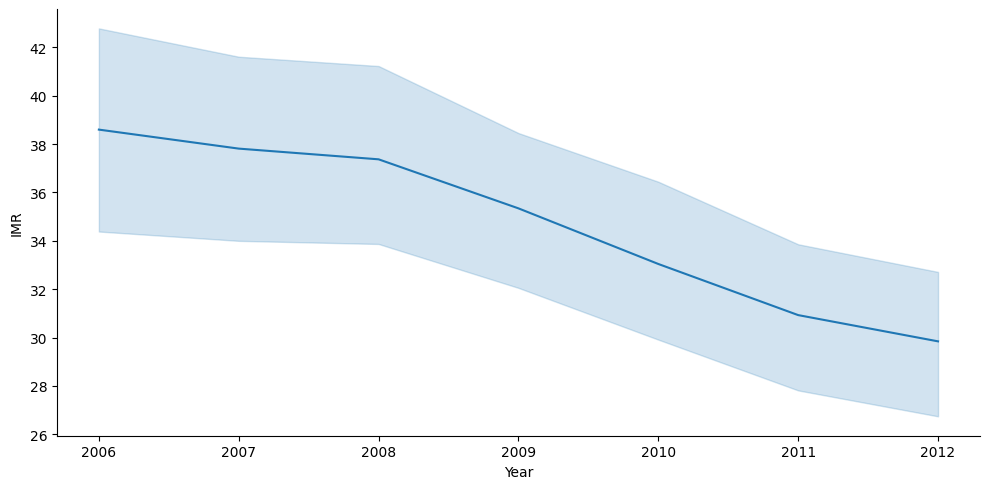

In [15]:
sns.relplot(kind = 'line', data = df, x = 'Year', y = 'IMR', height =5, aspect =2)
plt.savefig(r'yearly_trend.png')
plt.show()

From above we can observe that there is an overall decline in IMR cases in India which reflects Advancement in medical domain over the years.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be place

<Figure size 1000x600 with 0 Axes>

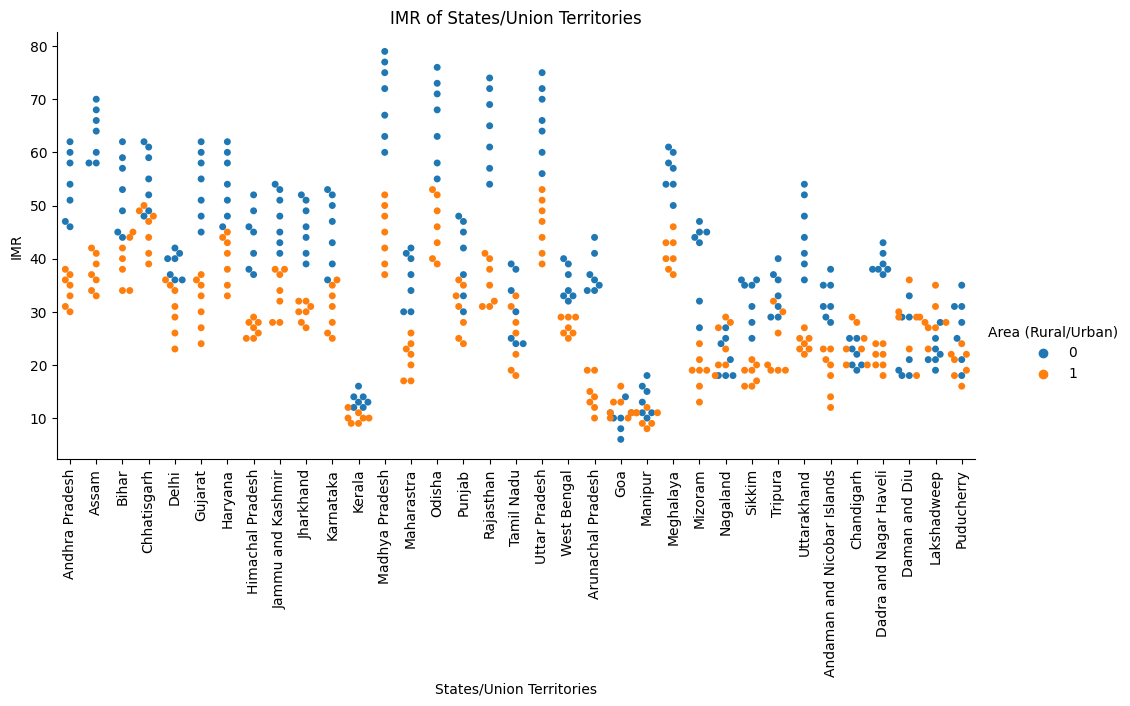

In [16]:
plt.figure(figsize=(10, 6))
sns.catplot(x='States/Uts', y='IMR', data=df, kind='swarm', height=5, aspect=2, hue = 'Area (Rural/Urban)')
plt.xlabel('States/Union Territories')
plt.xticks(rotation = 90)
plt.ylabel('IMR')
plt.title('IMR of States/Union Territories')
plt.show()

In above graph, we notice Infant Mortality Rates are mostly higher in rural areas in comparison to Urban areas which shows lack of medical facilities in rural areas of India.

In [17]:
# Preparing data for visualization
tl_state_avg = pd.DataFrame()
tl_state_avg['States/Uts'] = tl['India/States/Uts']
tl_state_avg['Total'] = np.array(tl.filter(like='Total').mean(axis = 1))
tl_state_avg['Rural'] = np.array(tl.filter(like='Rural').mean(axis = 1))
tl_state_avg['Urban'] = np.array(tl.filter(like='Urban').mean(axis = 1))

tl_state_avg.set_index('States/Uts', inplace = True)

In [18]:
tl_state_avg

,Total,Rural,Urban
States/Uts,,,
Andhra Pradesh,48.714286,54.000000,34.285714
Assam,60.857143,63.428571,37.428571
Bihar,51.571429,52.714286,39.571429
Chhatisgarh,53.857143,55.142857,45.428571
Delhi,32.000000,38.857143,30.571429
Gujarat,46.571429,54.142857,31.714286
Haryana,50.142857,54.142857,39.857143
Himachal Pradesh,42.857143,44.000000,26.857143
Jammu and Kashmir,45.714286,47.857143,33.571429


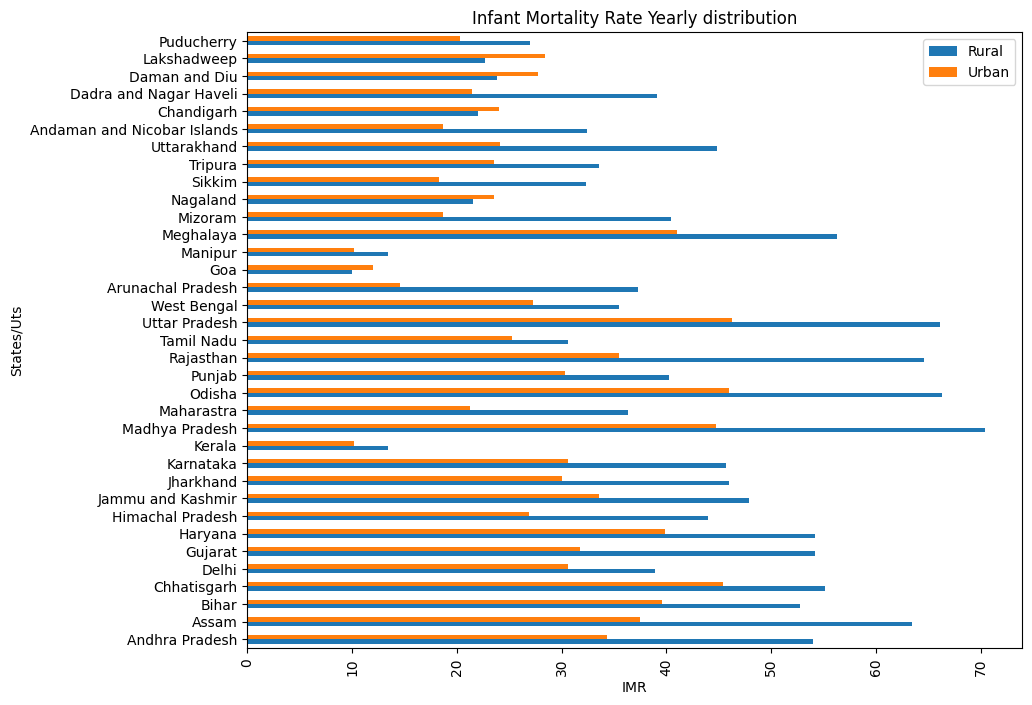

In [19]:
tl_state_avg[["Rural", "Urban"]].plot.barh(figsize = (10,8))

plt.xlabel("States/Uts")
plt.xticks(rotation = 90)
plt.xlabel("IMR")
plt.legend(["Rural", "Urban"])
plt.title("Infant Mortality Rate Yearly distribution")
plt.show()

- From the graph, we can notice, IMR is highest in rural areas of **Madhya Pradesh**. In urban areas, it is maximum in **Uttar Pradesh**.

- We can also observe that the Infant Mortality Rate difference between rural and urban areas is maximum in Rajasthan. This implies that the advancement in medical facilities is more focussed in urban areas than in rural areas in **Rajasthan**.

- Overall, we can conclude **Goa** has the minimum IMR values in rural and urban areas indicating better access to healthcare in these areas.

#Data Splitting

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = x['States/Uts'])

In [21]:
x_train

,States/Uts,Year,Area (Rural/Urban)
156,17,2008,0
10,1,2009,1
369,29,2011,0
462,18,2006,0
220,27,2009,1
...,...,...,...
480,26,2010,0
349,23,2012,1
203,25,2006,1
454,8,2012,0


In [22]:
x_test

,States/Uts,Year,Area (Rural/Urban)
126,15,2006,0
343,23,2006,1
365,29,2007,0
452,8,2010,0
18,3,2010,0
...,...,...,...
248,30,2009,1
132,15,2012,0
411,0,2011,0
455,8,2006,1


In [23]:
y_train

156    12.0
10     35.0
369    28.0
462    19.0
220    31.0
       ... 
480    25.0
349    19.0
203    53.0
454    18.0
143    47.0
Name: IMR, Length: 367, dtype: float64

In [24]:
y_test

126    52.0
343    13.0
365    36.0
452    19.0
18     60.0
       ... 
248    26.0
132    39.0
411    28.0
455    18.0
123    32.0
Name: IMR, Length: 123, dtype: float64

#Data Modeling

In [25]:
# Storing all model names we will be using for analysis at the end
models = [
          'Linear Regression',
          'Polynomial Regression',
          'Ridge Regression',
          'Decision Tree Regression',
          'K-Nearest Neighbors Regression',
          'Bayesian Linear Regression'
          ]
mser = [] # to store Mean Square Error of all models
r2 = [] # to store R2 Score of all models

Defining functions which will be used further while modeling.

In [26]:
# To add Mean Square Error value to list 'mser'
def mse_add(yhat):
  m = mean_squared_error(y_test, yhat)
  print('The mean square error: ', m)
  mser.append(round(m, 3))

In [27]:
# to add R2 score to list 'r2'
def r2_add(yhat):
  r = r2_score(y_test, yhat)
  print('The R2 score: ', r)
  r2.append(round(r, 5))

In [28]:
# To find the best parameter for a particular model from a given list of parameters
def grid_search_cv(model, param_grid):

  grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error').fit(x_train, y_train)

  # Get the best parameter from the grid search
  p = list(param_grid.keys())[0] # Accesssing Parameter name from given dictionary
  print('Best %s: ' %p, grid_search.best_params_[p])

## Linear Regression

In [29]:
lr = LinearRegression().fit(x_train, y_train)
yhat_lr = lr.predict(x_test)
yhat_lr[:5]

array([45.54839747, 32.35735173, 43.9725002 , 40.02950215, 40.09177943])

In [30]:
mse_add(yhat_lr)

The mean square error:  192.5730415666175


In [31]:
r2_add(yhat_lr)

The R2 score:  0.21152021245395647


## Polynomial Regression

<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

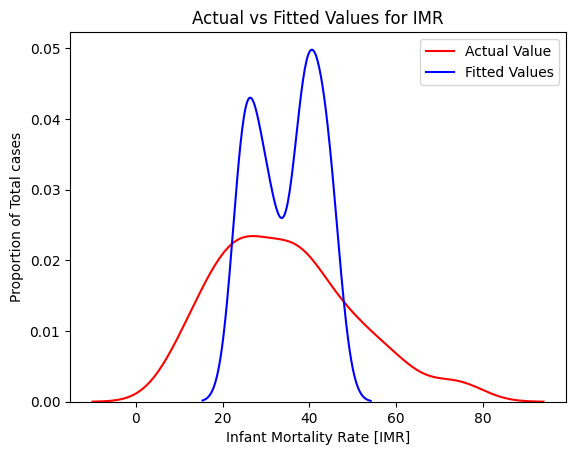

degree =  1
The mean square error of actual and predicted value of IMR is:  192.57304156661752
The R-square value is:  0.21152021245395636


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

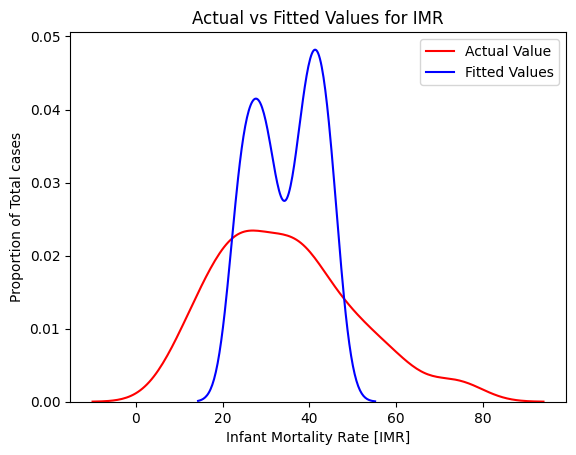

degree =  2
The mean square error of actual and predicted value of IMR is:  190.4075531986374
The R-square value is:  0.22038668615363943


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

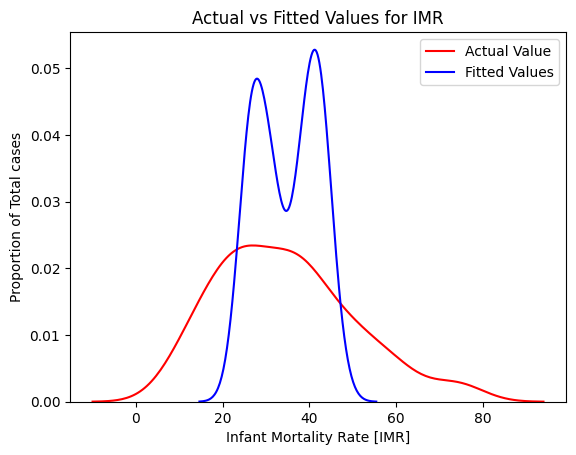

degree =  3
The mean square error of actual and predicted value of IMR is:  196.00773914794487
The R-square value is:  0.19745703103885126


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

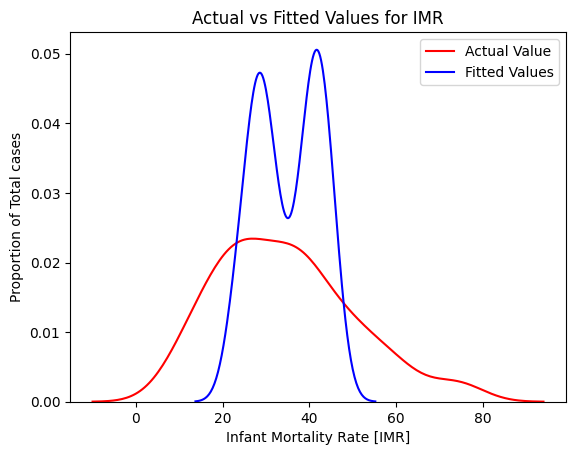

degree =  4
The mean square error of actual and predicted value of IMR is:  194.45073588477635
The R-square value is:  0.20383209575281291


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

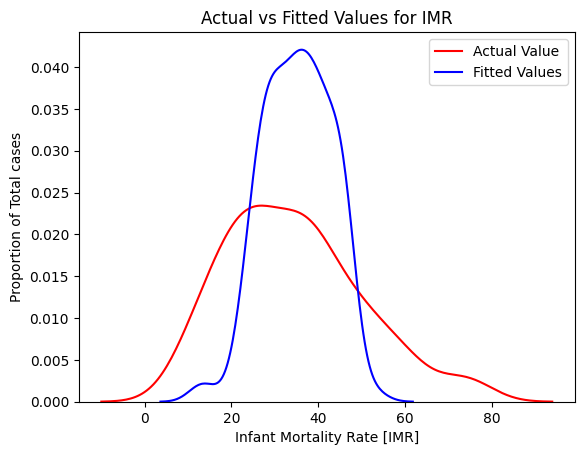

degree =  5
The mean square error of actual and predicted value of IMR is:  193.7821908659779
The R-square value is:  0.20656941677188623


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

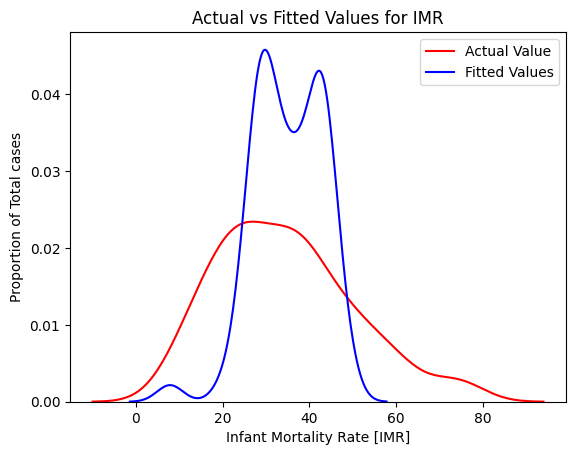

degree =  6
The mean square error of actual and predicted value of IMR is:  188.3044748639431
The R-square value is:  0.2289976253850209


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

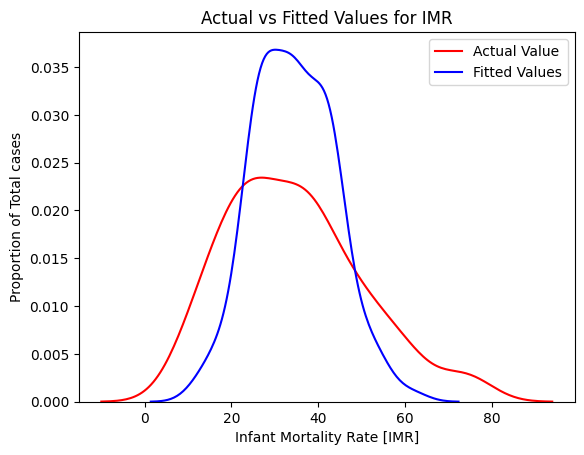

degree =  7
The mean square error of actual and predicted value of IMR is:  236.8455933913651
The R-square value is:  0.030248670119084275


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

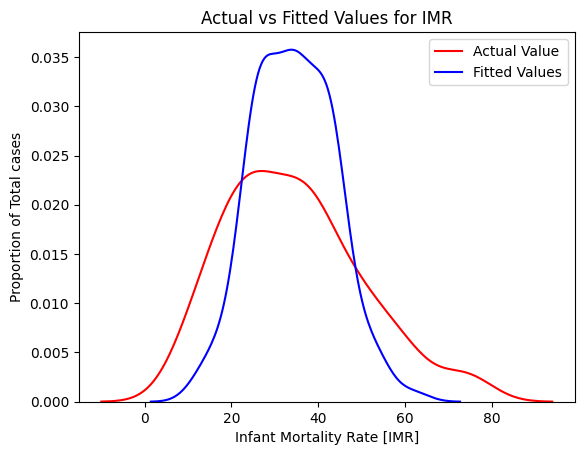

degree =  8
The mean square error of actual and predicted value of IMR is:  233.5130705753494
The R-square value is:  0.043893502545202634


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

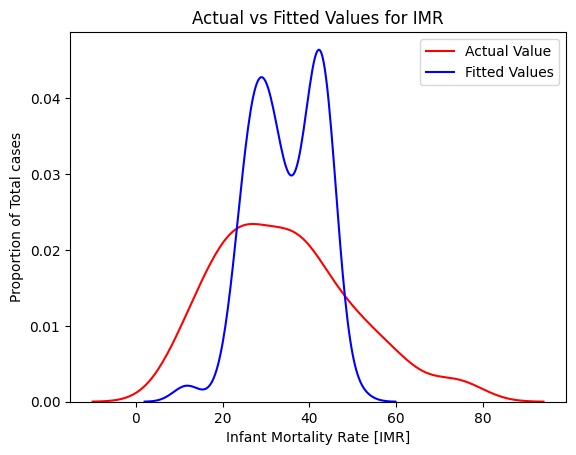

degree =  9
The mean square error of actual and predicted value of IMR is:  189.75258251434656
The R-square value is:  0.22306842780240432


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

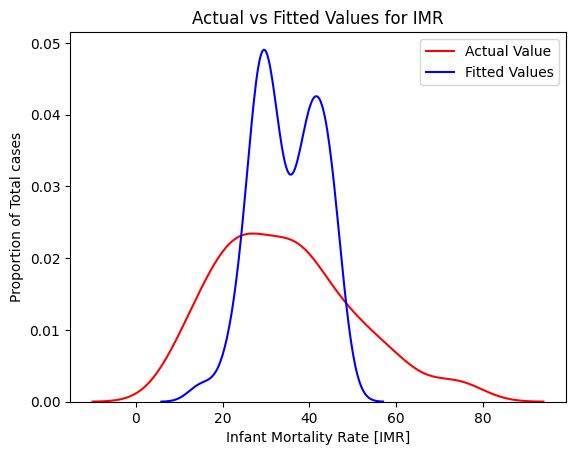

degree =  10
The mean square error of actual and predicted value of IMR is:  188.53027424993337
The R-square value is:  0.22807310214726517


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

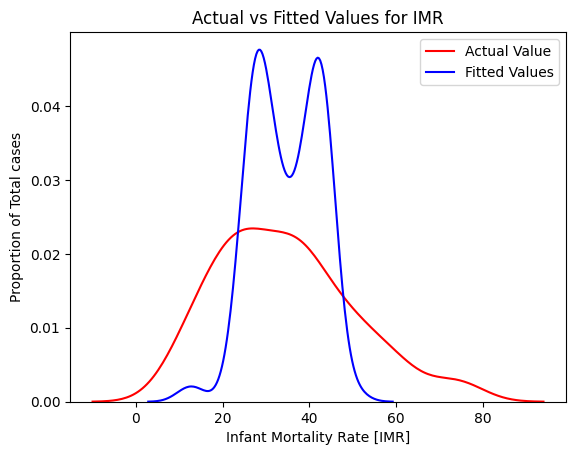

degree =  11
The mean square error of actual and predicted value of IMR is:  192.75302967942264
The R-square value is:  0.21078326096899835


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

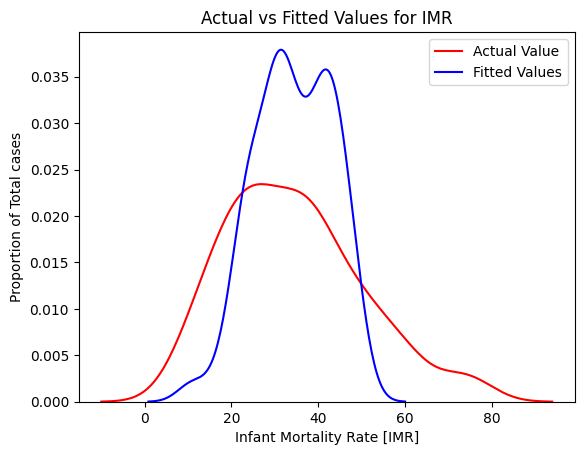

degree =  12
The mean square error of actual and predicted value of IMR is:  184.78845809630542
The R-square value is:  0.24339376376141064


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

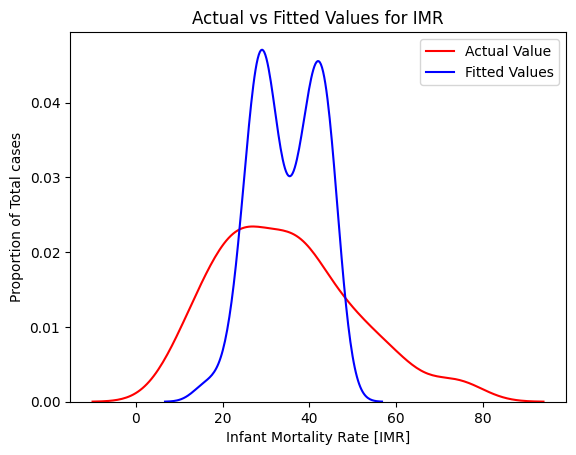

degree =  13
The mean square error of actual and predicted value of IMR is:  188.55048147161668
The R-square value is:  0.22799036478314538


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

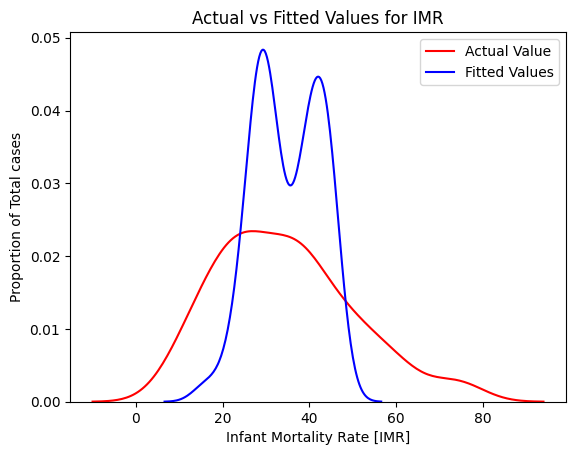

degree =  14
The mean square error of actual and predicted value of IMR is:  190.04824653791871
The R-square value is:  0.22185784762672311


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

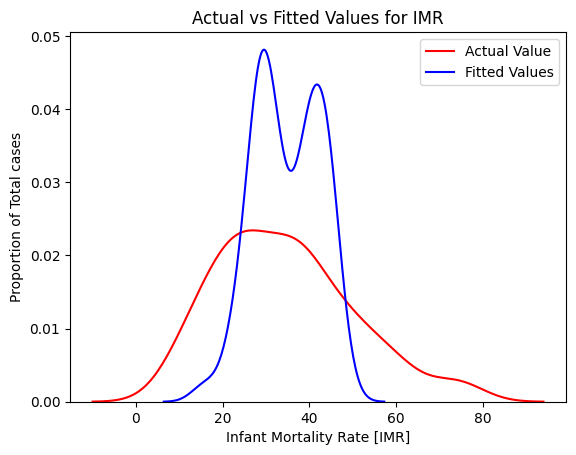

degree =  15
The mean square error of actual and predicted value of IMR is:  188.90908768688317
The R-square value is:  0.22652207124566082


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

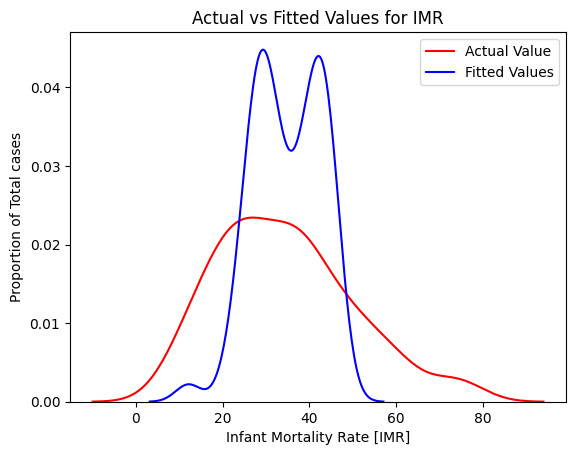

degree =  16
The mean square error of actual and predicted value of IMR is:  186.08466461916944
The R-square value is:  0.2380865170385611


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

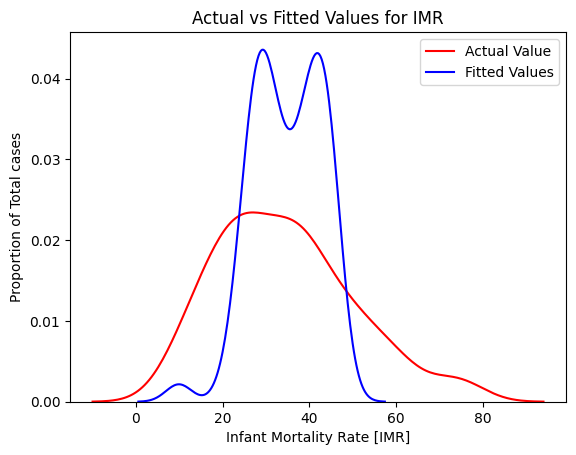

degree =  17
The mean square error of actual and predicted value of IMR is:  186.05151191530683
The R-square value is:  0.2382222589715206


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

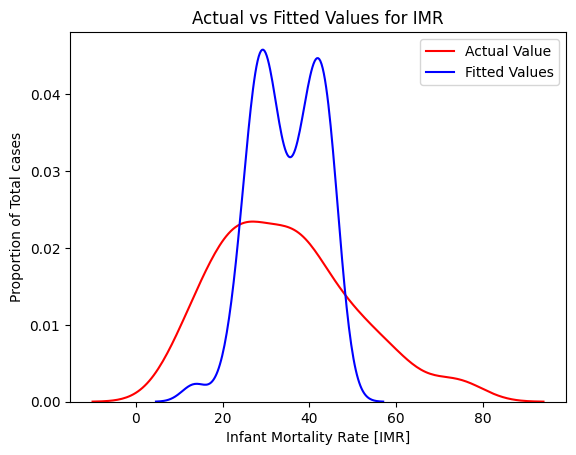

degree =  18
The mean square error of actual and predicted value of IMR is:  187.50712302616006
The R-square value is:  0.23226233888043057


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

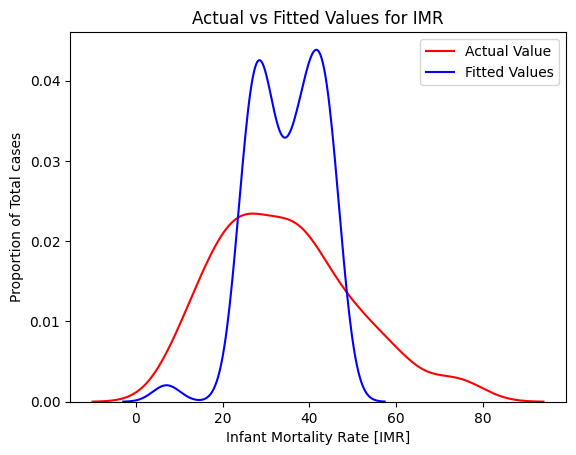

degree =  19
The mean square error of actual and predicted value of IMR is:  185.78010033005256
The R-square value is:  0.2393335388647907


<ipython-input-32-f871326c3cd6>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-f871326c3cd6>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" 

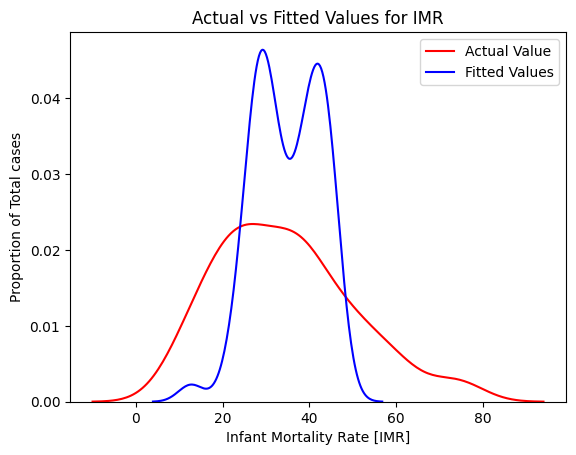

degree =  20
The mean square error of actual and predicted value of IMR is:  187.7003295946484
The R-square value is:  0.23147126515154892


In [32]:
for i in range(1,21):

  poly = PolynomialFeatures(degree = i)
  x_train_p = poly.fit_transform(x_train)
  x_test_p = poly.transform(x_test)

  poly.fit(x_train_p, y_train)

  plr = LinearRegression().fit(x_train_p, y_train)
  yhat_plr = plr.predict(x_test_p)
  yhat_plr[:5]

  # Distribution Plot of predicted vs actual values
  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
  sns.distplot(yhat_plr, hist=False, color="b", label="Fitted Values" , ax=ax1)
  plt.legend()
  plt.title('Actual vs Fitted Values for IMR')
  plt.xlabel('Infant Mortality Rate [IMR]')
  plt.ylabel('Proportion of Total cases')

  plt.show()

  print('degree = ',i)
  mse = mean_squared_error(y_test, yhat_plr)
  print('The mean square error of actual and predicted value of IMR is: ', mse)

  r_squared = r2_score(y_test, yhat_plr)
  print('The R-square value is: ', r_squared)

We can observe that at degree = 19, thr mean square error is minimum and R2 value is maximum for Polynomial Regression model with values 191.9995064741104 and 0.1932242656355705 respectively.

In [33]:
poly = PolynomialFeatures(degree = 19)
x_train_p = poly.fit_transform(x_train)
x_test_p = poly.transform(x_test)

poly.fit(x_train_p, y_train)

plr = LinearRegression().fit(x_train_p, y_train)
yhat_plr = plr.predict(x_test_p)
yhat_plr[:5]

array([46.02240457, 28.9768499 , 46.12688185, 35.43113332, 45.30515714])

In [34]:
mse_add(yhat_plr)

The mean square error:  185.78010033005256


In [35]:
r2_add(yhat_plr)

The R2 score:  0.2393335388647907


## Ridge Regression

We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [36]:
parameters1= {'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}
rr=Ridge()
grid_search_cv(rr, parameters1)

Best alpha:  0.001


In [37]:
rr = Ridge(1).fit(x_train, y_train)
yhat_rr = rr.predict(x_test)
yhat_rr[:5]

array([45.47005594, 32.41932816, 43.89414183, 39.96075273, 40.02379664])

In [38]:
mse_add(yhat_rr)

The mean square error:  192.46962155902403


In [39]:
r2_add(yhat_rr)

The R2 score:  0.21194366001936815


## Decision Trees

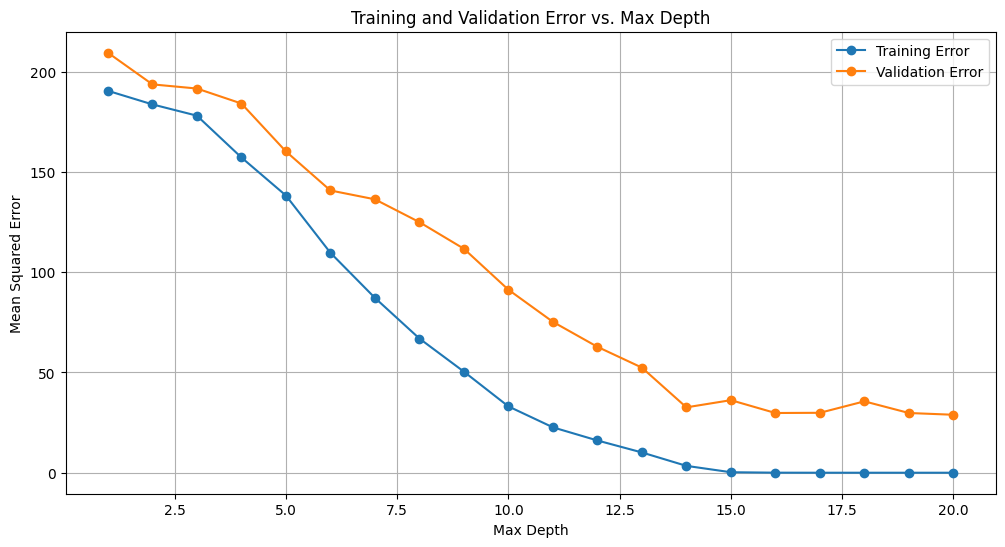

In [40]:
train_errors = []
test_errors = []
max_depth_values = range(1, 21)
for i in max_depth_values:
  tr = DecisionTreeRegressor(max_depth=i).fit(x_train, y_train)
  y_train_pred = tr.predict(x_train)
  y_test_pred = tr.predict(x_test)
  # Calculate mean squared errors
  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)

  # Append errors to lists
  train_errors.append(train_mse)
  test_errors.append(test_mse)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(max_depth_values, train_errors, label='Training Error', marker='o')
plt.plot(max_depth_values, test_errors, label='Validation Error', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Error vs. Max Depth')
plt.legend()
plt.grid(True)

plt.show()

Since, at Max depth = 2, the validation error for the first time, starts to increase while the training error keeps decreasing, it is the appropriate value to prevent overfitting.

In [41]:
tr = DecisionTreeRegressor(max_depth=2).fit(x_train, y_train)
yhat_tr = tr.predict(x_test)

In [42]:
mse_add(yhat_tr)

The mean square error:  193.70089311946703


In [43]:
r2_add(yhat_tr)

The R2 score:  0.20690228594908455


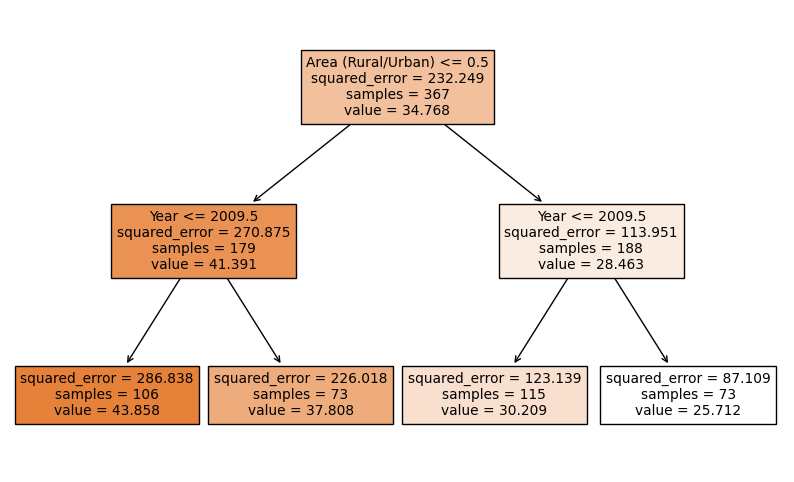

In [44]:
# Visualizing the decision tree
plt.figure(figsize = (10,6))
tree.plot_tree(
                tr,
                feature_names = x_train.columns,
                filled=True
              )
plt.show()

## K-Nearest Neighbors (KNN) Regression:

In [45]:
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_search_cv(knn, param_grid)

Best n_neighbors:  3


In [46]:
knn = KNeighborsRegressor(n_neighbors = 3).fit(x_train, y_train)
yhat_knn = knn.predict(x_test)
yhat_knn[:5]

array([41.        , 25.        , 36.        , 31.        , 42.66666667])

In [47]:
mse_add(yhat_knn)

The mean square error:  114.19602529358627


In [48]:
r2_add(yhat_tr)

The R2 score:  0.20690228594908455


## Bayesian Linear Regression

In [49]:
br = BayesianRidge().fit(x_train, y_train)
yhat_br = br.predict(x_test)
yhat_br[:5]

array([45.2895284 , 32.56176615, 43.71364145, 39.80259767, 39.86740855])

In [50]:
mse_add(yhat_br)

The mean square error:  192.27091407308998


In [51]:
r2_add(yhat_br)

The R2 score:  0.21275725695390513


# Result

In [52]:
result = pd.DataFrame({'MSE': mser, ' R2 Score': r2}, index = models)
result

,MSE,R2 Score
Linear Regression,192.573,0.21152
Polynomial Regression,185.780,0.23933
Ridge Regression,192.470,0.21194
Decision Tree Regression,193.701,0.20690
K-Nearest Neighbors Regression,114.196,0.20690
Bayesian Linear Regression,192.271,0.21276


From above we can infer that 'KNN Regression' has least Mean Square Error but its R2 score is very low.So, it is not am ideal model. Next is 'Bayesian Linear Regression' with second minimum Mean Square Error & also it has maximum R2 score.

Thus, Bayesian Linear Regression is the most efficient model here.

<h1> Author

<h3>Pallavi Raghuvanshi